<a href="https://colab.research.google.com/github/ASN-Lab/Big-Data/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-2
Pengolahan & analisa data sederhana pada Notebook di Anaconda berbasis virtual machine Ubuntu

## Inisiasi

In [ ]:
import os
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Mengatur IP lokal untuk menghindari warning
os.environ["SPARK_LOCAL_IP"] = "127.0.0.1"

# Memulai Spark session
spark = SparkSession.builder \
    .appName("BigDataPractice") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

print("Spark berfungsi!!")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/02 23:47:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark berfungsi!!


# Latihan

## Penggunaan PySpark
membuat dataframe sederhana pada data

In [ ]:
# Membuat DataFrame sederhayna
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("DataFrame awal:")
df.show()

DataFrame awal:


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



## Penggunaan PySpark(Lanjutan)

In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



## Pandas

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


## Pandas(Lanjutan)

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


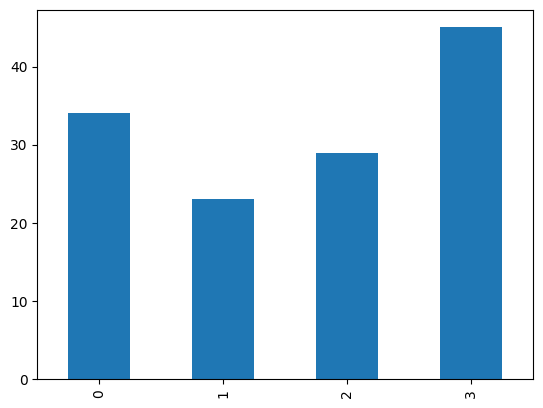

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

## PySpark & Pandas

In [ ]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



(    Nama  Usia
 0    Ali    34
 1   Budi    23
 2  Citra    29
 3   Dina    45,
 None)

## Konversi PySpark & Pandas

In [ ]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



(    Nama  Usia
 0    Ali    34
 1   Budi    23
 2  Citra    29
 3   Dina    45,
 None)

# Tugas

## 1. Modifikasi kode program(PySpark)
Membuat modifikasi kode program dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import Row

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [
    ("Ali", 34, "Dokter", "Membaca", "L"),
    ("Budi", 23, "Guru", "Sepak Bola", "L"),
    ("Citra", 29, "Insinyur", "Memasak", "P"),
    ("Dina", 45, "Perawat", "Berkebun", "P"),
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("DataFrame baru:")
df.show()

DataFrame baru:
+-----+----+---------+----------+------+
| Nama|Usia|Pekerjaan|      Hobi|Gender|
+-----+----+---------+----------+------+
|  Ali|  34|   Dokter|   Membaca|     L|
| Budi|  23|     Guru|Sepak Bola|     L|
|Citra|  29| Insinyur|   Memasak|     P|
| Dina|  45|  Perawat|  Berkebun|     P|
+-----+----+---------+----------+------+



## 2. PySpark(Lanjutan)
Membuat filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark

In [ ]:
print("DataFrame awal:")
df.show()

# Filtering data
print("DataFrame filterisasi:")
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
print("DataFrame penghitungan rata-rata:")
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
print("DataFrame pengurutan usia:")
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

DataFrame awal:
+-----+----+---------+----------+------+
| Nama|Usia|Pekerjaan|      Hobi|Gender|
+-----+----+---------+----------+------+
|  Ali|  34|   Dokter|   Membaca|     L|
| Budi|  23|     Guru|Sepak Bola|     L|
|Citra|  29| Insinyur|   Memasak|     P|
| Dina|  45|  Perawat|  Berkebun|     P|
+-----+----+---------+----------+------+

DataFrame filterisasi:
+----+----+---------+--------+------+
|Nama|Usia|Pekerjaan|    Hobi|Gender|
+----+----+---------+--------+------+
| Ali|  34|   Dokter| Membaca|     L|
|Dina|  45|  Perawat|Berkebun|     P|
+----+----+---------+--------+------+

DataFrame penghitungan rata-rata:
+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

DataFrame pengurutan usia:
+-----+----+---------+----------+------+
| Nama|Usia|Pekerjaan|      Hobi|Gender|
+-----+----+---------+----------+------+
| Dina|  45|  Perawat|  Berkebun|     P|
|  Ali|  34|   Dokter|   Membaca|     L|
|Citra|  29| Insinyur|   Memasak|     P|
| Budi|  23|     Guru|Sepak Bola|  

## 3. Pandas
Memodifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi berupa filtering data berdasarkan usia.

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"], "Hobi": ["Membaca","Sepak Bola", "Memasak", "Berkebun"], "Gender": ["L", "L", "P", "P"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame
df_pandas

,Nama,Usia,Pekerjaan,Hobi,Gender
0,Ali,34,Dokter,Membaca,L
1,Budi,23,Guru,Sepak Bola,L
2,Citra,29,Insinyur,Memasak,P
3,Dina,45,Perawat,Berkebun,P


In [ ]:
# Filterisasi berupa usia di atas 30
print("DataFrame filterisasi:")
df_pandas_filtered = df_pandas[df_pandas["Usia"] >= 30]
df_pandas_filtered

DataFrame filterisasi:


,Nama,Usia,Pekerjaan,Hobi,Gender
0,Ali,34,Dokter,Membaca,L
3,Dina,45,Perawat,Berkebun,P


## 4. Pandas(Lanjutan)
Mengonversi DataFrame antara PySpark dan Pandas Praktik untuk convert DataFrame dari PySpark ke Pandas dan sebaliknya.

Hasil konversi:
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

Statistik deskriptif:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000

Visualisasi:


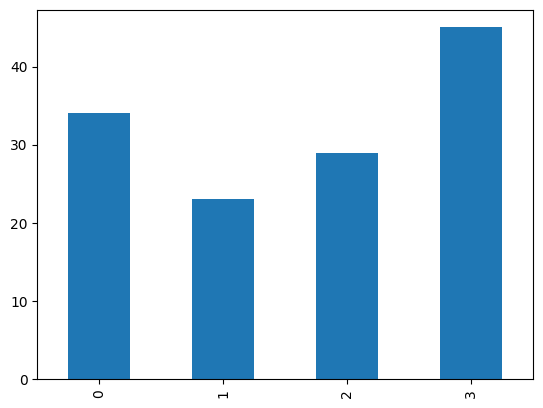

In [ ]:
import pandas as pd

# DataFrame 1
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# DataFrame 2
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join pada kolom Nama
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print("Hasil konversi:")
print(df_joined)

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df_pandas.describe())

# Plot
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
print("\nVisualisasi:")
plt.show()

## 5. PySpark & Pandas
Menggunakan metode penggabungan PySpark & Pandas untuk menggabungkan data yang ada di PySpark dengan data dari Pandas, kemudian menganalisis data untuk menghitung rata-rata usia.

In [ ]:
# Spark ke Pandas
df_pandas_from_spark = df.toPandas()

# Gabungan dengan df_pandas
df_combined = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", suffixes=("_spark", "_pandas"))

# Contoh analisis sederhana
avg_usia = df_combined[["Usia_spark", "Usia_pandas"]].mean()
avg_usia

Usia_spark     32.75
Usia_pandas    32.75
dtype: float64

## 6. Operasi penggabungan PySpark & Pandas
Penggabungan data dari PySpark dan Pandas, untuk melakukan operasi statistik berupa menghitung nilai maksimum usia.


In [ ]:
# Penggabungan DataFrame Pandas
df_combined["Usia_Maks"] = df_combined[["Usia_spark", "Usia_pandas"]].max(axis=1)
df_combined[["Nama", "Usia_Maks"]]

,Nama,Usia_Maks
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45
